# Analysis of the risk of failure of the Challenger shuttle O-rings

## I. First attempt of Improvement

The original paper shows commendable efforts to understand the risk of O-ring failure, but some errors in reasoning led to an underestimation of the risk. We will try to improve some aspects of the analysis to provide more reliable results.

### Importing necessary libraries

In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Loading data
Data from previous spaceflights, including temperatures, number of O-rings observed, and number of malfunctions, are loaded into a DataFrame data.

In [23]:
data = pd.read_csv("shuttle.csv")

### Graphical data inspection

#### Calculation of failure frequency
The "failure frequency" of O-rings for each flight is calculated by dividing the number of observed malfunctions (Malfunction) by the total number of O-rings tested (Count). This gives an idea of ​​the proportion of seals that failed during each flight.

In [24]:
# Do not exclude flights without failure
data["Frequency"] = data.Malfunction / data.Count
data

,Date,Count,Temperature,Pressure,Malfunction,Frequency
0,4/12/81,6,66,50,0,0.000000
1,11/12/81,6,70,50,1,0.166667
2,3/22/82,6,69,50,0,0.000000
3,11/11/82,6,68,50,0,0.000000
4,4/04/83,6,67,50,0,0.000000
5,6/18/82,6,72,50,0,0.000000
6,8/30/83,6,73,100,0,0.000000
7,11/28/83,6,70,100,0,0.000000
8,2/03/84,6,57,200,1,0.166667
9,4/06/84,6,63,200,1,0.166667


Including all flights, including those without failures, provides a more complete view of the operating conditions of the O-rings. This avoids biasing the analysis by focusing only on malfunction cases and provides a better understanding of the conditions under which the seals operate properly.

#### Initial data visualization

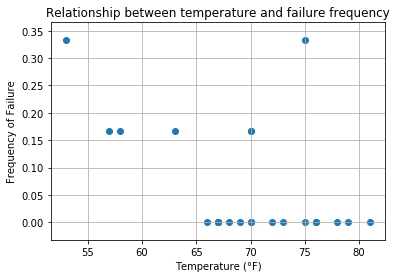

In [25]:
plt.scatter(data["Temperature"], data["Frequency"])
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency of Failure")
plt.grid(True)
plt.title("Relationship between temperature and failure frequency")
plt.show()

This graph shows the relationship between flight temperature and failure frequency. Each point represents a flight and its associated temperature, with the failure frequency on the ordinate (vertical axis). This helps visualize whether there is a visible link between a drop in temperature and an increase in failures.

Although there is an apparent trend of increasing malfunctions at lower temperatures, this needs to be confirmed by a statistical model (logistic regression). The inclusion of all flights, including those without failures, is essential to obtain a complete picture of the relationship between temperature and malfunctions.

### Estimation of the influence of temperature
This part of the code uses a logistic regression model to estimate the impact of temperature on the probability of O-ring failure. The model takes "temperature" as the explanatory (or predictive) variable and "failure frequency" as the dependent (or response) variable.

#### Logistic regression on the entire data set

In [26]:
data["Intercept"] = 1
logmodel = sm.GLM(data['Frequency'], data[['Intercept', 'Temperature']], family=sm.families.Binomial(sm.families.links.logit())).fit()

In [27]:
print(logmodel.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Frequency   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3.9210
Date:                Mon, 21 Oct 2024   Deviance:                       3.0144
Time:                        09:32:40   Pearson chi2:                     5.00
No. Iterations:                     6   Covariance Type:             nonrobust
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0850      7.477      0.680      0.496      -9.570      19.740
Temperature    -0.1156      0.115     -1.004     

*Interpretation :*

* Intercept Coefficient: 5.0850
The intercept represents the predicted value of the failure frequency when the temperature is at 0°F. This is not very physically relevant, since temperatures in this setting are never that low, but the intercept is part of the model to fit the logistic curve.

* Temperature Coefficient: -0.1156
This negative coefficient indicates that as the temperature increases, the probability of failure decreases slightly. However, the effect is small and not significant.

* Temperature P-value: 0.316
With a p-value of 0.316 (greater than 0.05), this means that the effect of temperature on failure frequency is not statistically significant in this model. In other words, the analysis does not allow us to conclude that temperature has a significant effect on O-ring failures, probably due to the small sample size or the variability of the data.

* Temperature confidence interval: [-0.341, 0.110]
This interval contains 0, which confirms that the effect of temperature could be zero.

*Conclusion :*
The logistic regression model shows a trend suggesting that higher temperatures may reduce the probability of failure, but this relationship is not statistically significant in this case. It would be necessary to explore other variables or increase the sample size to obtain a more precise analysis.

### Estimation of the probability of O-ring malfunction

#### Model predictions for a range of temperatures
Here, predictions are generated for a temperature range from 30°F to 90°F. The model predicts the failure frequency for each of these temperatures, allowing us to see the predicted failure probability for extreme temperatures such as 31°F (the temperature on the day of the disaster).

In [28]:
data_pred = pd.DataFrame({'Temperature': np.linspace(start=30, stop=90, num=121), 'Intercept': 1})
data_pred['Frequency'] = logmodel.predict(data_pred[['Intercept', 'Temperature']])

An increase in failure probability is expected for low temperatures, if the model is well fitted.

#### Visualization of predictions with confidence interval

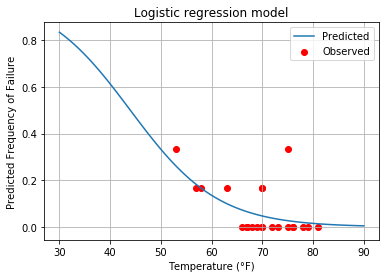

In [29]:
plt.plot(data_pred['Temperature'], data_pred['Frequency'], label='Predicted')
plt.scatter(data["Temperature"], data["Frequency"], color='red', label='Observed')
plt.xlabel("Temperature (°F)")
plt.ylabel("Predicted Frequency of Failure")
plt.legend()
plt.grid(True)
plt.title("Logistic regression model")
plt.show()

#### Uncertainty of estimates (Confidence interval)

In [30]:
# Taking uncertainty into account
# Added confidence interval representation
conf = logmodel.conf_int()
print("Confidence interval for parameters :\n", conf)

Confidence interval for parameters :
                     0          1
Intercept   -9.569730  19.739685
Temperature -0.341358   0.110156


*Interpretation :*

* Intercept : [-9.5697, 19.7397]
The confidence interval for the intercept is very wide, which means there is a large uncertainty about this estimate. This indicates that the data do not provide a precise estimate of the intercept.

* Temperature : [-0.3414, 0.1102]
The confidence interval for the temperature coefficient is also wide and includes zero. This means that the effect of temperature could be zero or even slightly positive or negative. In other words, one cannot conclude with certainty that temperature has a significant impact on the probability of failure.

*Conclusion :* These confidence intervals reveal a large uncertainty in the model estimates. In particular, the temperature interval being wide and containing zero, this reinforces the fact that the effect of temperature on failures is not statistically significant in this analysis. This suggests that a model revision or additional data would be necessary to draw reliable conclusions.

## II. Second attempt of Improvement

### Trying non-linear transformations
Let's try adding a data transformation, for example by adding a quadratic variable "*Temperature_squared* " to the model to capture nonlinear effects:

In [31]:
data["Temperature_squared"] = data["Temperature"] ** 2
logmodel = sm.GLM(data['Frequency'], data[['Intercept', 'Temperature', 'Temperature_squared']], family=sm.families.Binomial(sm.families.links.logit())).fit()

In [32]:
print(logmodel.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Frequency   No. Observations:                   23
Model:                            GLM   Df Residuals:                       20
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3.8798
Date:                Mon, 21 Oct 2024   Deviance:                       2.9319
Time:                        09:32:48   Pearson chi2:                     4.48
No. Iterations:                     6   Covariance Type:             nonrobust
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              22.1261     58.284      0.380      0.704     -92.109     136.362
Temperature            -0

*Interpretation :*

* Intercept: 22.1261
The intercept is very high but its wide confidence interval and p-value (0.704) indicate that this estimate is extremely uncertain and not significant.

* Temperature coefficient: -0.6509
This coefficient remains negative, which would indicate that, overall, an increase in temperature could reduce the probability of failure. However, with a p-value of 0.720, this effect is not statistically significant. The very wide confidence interval ([-4.207, 2.905]) confirms this uncertainty.

* Temperature_squared coefficient: 0.0041
Adding this quadratic component allows us to test whether the relationship between temperature and the probability of failure is curved. However, this coefficient is very small and, with a p-value of 0.766, it is not significant either. The confidence interval includes zero ([-0.023, 0.031]), which means that the quadratic effect might not exist.

*Conclusion :*

* Adding a quadratic component did not improve the significance of the model. The coefficients of temperature and Temperature_squared are not statistically significant (p-values ​​are greater than 0.05), meaning that in this analysis there is no clear evidence that temperature has a significant effect on the probability of O-ring failure, either linearly or nonlinearly.

* The wide confidence intervals and high p-values ​​indicate that there is a large uncertainty in the estimates. This could be due to the small sample size and the lack of data for very low temperatures, where the risk of failure could be higher.

### Exploring other explanatory variables
We'll try to include additional variables that might influence the probability of o-ring failure, such as pressure. We will also leave out temperature and its quadratic transformation, and add pressure as a factor in the model.

In [33]:
# Adding a column for the quadratic term of temperature
data["Temperature_squared"] = data["Temperature"] ** 2

# Logistic regression model with temperature, quadratic temperature term, and pressure
logmodel_extended = sm.GLM(data['Frequency'], 
                           data[['Intercept', 'Temperature', 'Temperature_squared', 'Pressure']], 
                           family=sm.families.Binomial(sm.families.links.logit())).fit()

# Summary of results
print(logmodel_extended.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Frequency   No. Observations:                   23
Model:                            GLM   Df Residuals:                       19
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3.7883
Date:                Mon, 21 Oct 2024   Deviance:                       2.7490
Time:                        09:32:50   Pearson chi2:                     4.14
No. Iterations:                     6   Covariance Type:             nonrobust
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.4977     64.779      0.131      0.896    -118.467     135.462
Temperature            -0

*Interpretation :*

* Intercept: 8.4977
The intercept coefficient remains very high, but with a p-value of 0.896, it is not statistically significant. This indicates a large uncertainty in this estimate.

* Temperature coefficient: -0.2808
The temperature coefficient remains negative, but it is still insignificant with a p-value of 0.886. This means that there is still no clear evidence that temperature (as a linear variable) significantly affects the probability of o-ring failure.

* Temperature_squared coefficient: 0.0014
The addition of the quadratic component still does not seem significant, with a p-value of 0.926. This means that adding a nonlinear term for temperature did not improve the modeling of the temperature effect.

* Pressure coefficient: 0.0079
The coefficient for pressure is positive, which would indicate that in this model, a small increase in pressure could increase the probability of failure. However, the p-value is 0.692, which means that this effect is not statistically significant. The confidence interval ([-0.031, 0.047]) includes zero, which confirms that the effect of pressure is uncertain.

*Conclusion :*

* Neither temperature, nor its quadratic component, nor pressure are significant in this model. The high p-values ​​indicate that none of these variables has a clear effect on the probability of O-ring failure based on the current data.

* Adding pressure did not reduce uncertainty in the model. The wide confidence intervals and high p-values ​​show that it is difficult to isolate a factor that significantly influences O-ring failures.